<a href="https://colab.research.google.com/github/PiyushGithub24/MACHINE_LEARNING_BY_PIYUSH_KUMAR/blob/main/Day_25_Normalization_(Date_12_06_24).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Feature Scaling : Normalization :--

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
wine=pd.read_csv('wine_data.csv',header=None,usecols=[0,1,2])
wine.columns=['Class Label','Alcohol','Malic Acid']

In [81]:
wine['Class Label'].unique()

array([1, 2, 3])

In [82]:
wine

,Class Label,Alcohol,Malic Acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


In [83]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Class Label  178 non-null    int64  
 1   Alcohol      178 non-null    float64
 2   Malic Acid   178 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 4.3 KB


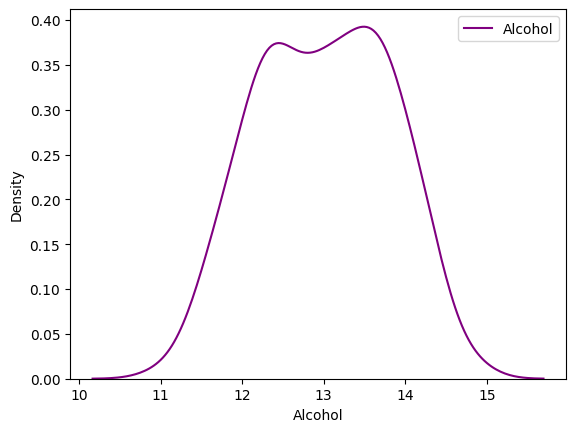

In [84]:
sns.kdeplot(wine['Alcohol'],label="Alcohol",color='purple')
plt.legend()

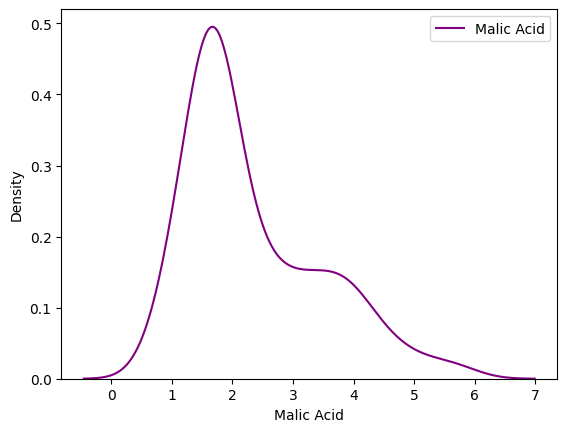

In [85]:
sns.kdeplot(wine['Malic Acid'],label="Malic Acid",color='purple')
plt.legend()

<Axes: xlabel='Alcohol', ylabel='Malic Acid'>

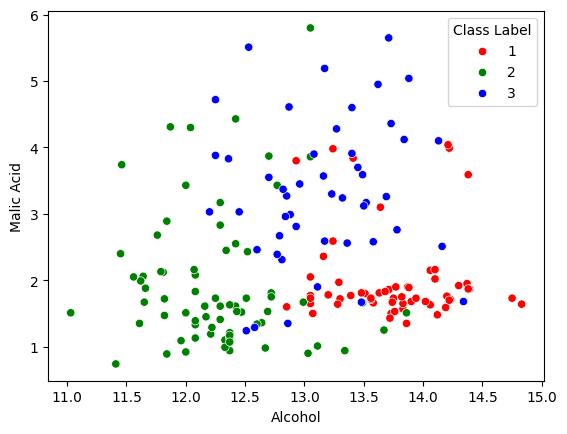

In [86]:
color_dict={1:'red',2:'green',3:'blue'}
sns.scatterplot(data=wine,x=wine['Alcohol'],y=wine['Malic Acid'],hue=wine['Class Label'],palette=color_dict)

#train_test_split :--

In [87]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(wine.drop('Class Label', axis=1),
                                                    wine['Class Label'],
                                                    test_size=0.3,
                                                    random_state=0)

x_train.shape, x_test.shape

((124, 2), (54, 2))

In [92]:
np.min(x_train['Alcohol']) ,np.min(x_train['Malic Acid'])

(11.03, 0.89)

In [94]:
np.max(x_train['Alcohol']) ,np.max(x_train['Malic Acid'])

(14.75, 5.65)

In [90]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(x_train)
scaler.data_max_ , scaler.data_min_

(array([14.75,  5.65]), array([11.03,  0.89]))

In [97]:
# transform train and test sets
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [102]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [103]:
np.round(x_train.describe(), 1)

,Alcohol,Malic Acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [104]:
np.round(x_train_scaled.describe(), 1)

,Alcohol,Malic Acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


#Scatterplot :-

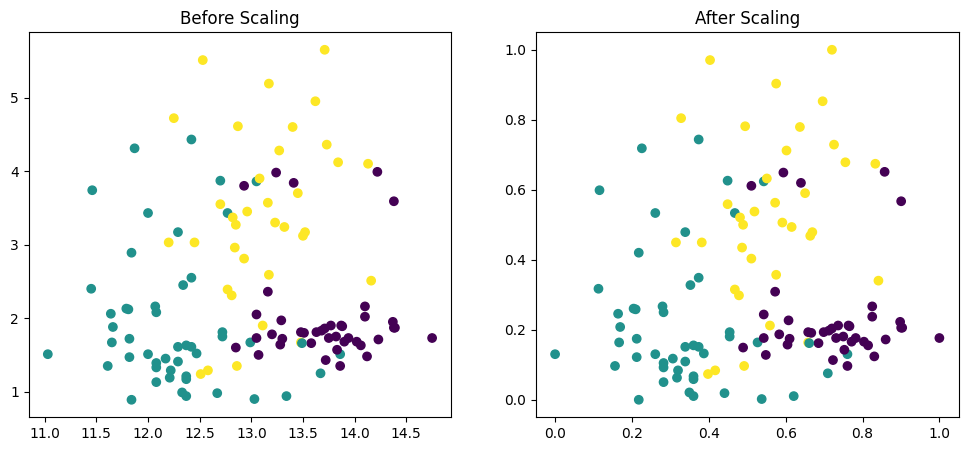

In [107]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(x_train['Alcohol'], x_train['Malic Acid'],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(x_train_scaled['Alcohol'], x_train_scaled['Malic Acid'],c=y_train)
ax2.set_title("After Scaling")
plt.show()

#kdeplot :--

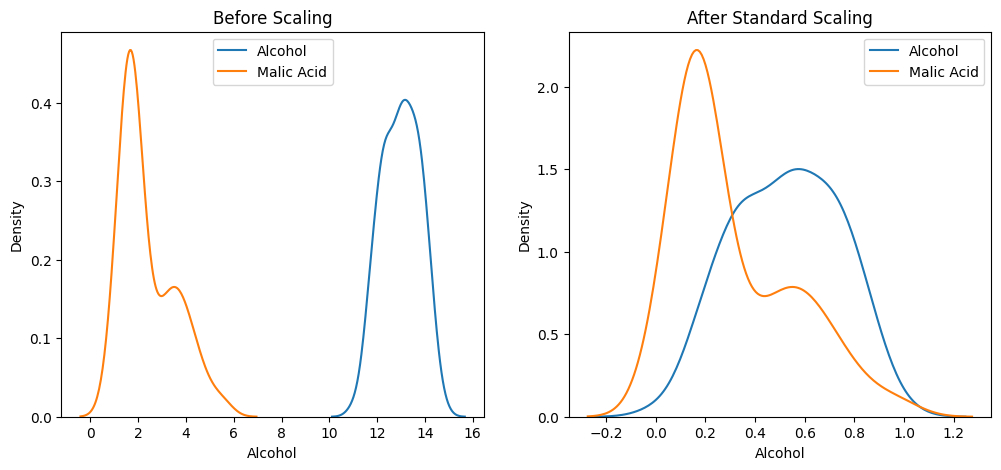

In [123]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['Alcohol'], ax=ax1,label='Alcohol')
sns.kdeplot(x_train['Malic Acid'], ax=ax1,label='Malic Acid')
ax1.legend(loc='upper center')

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(data=wine,x=x_train_scaled['Alcohol'], ax=ax2, label='Alcohol')
sns.kdeplot(data=wine,x=x_train_scaled['Malic Acid'], ax=ax2,label='Malic Acid')
ax2.legend()
plt.show()

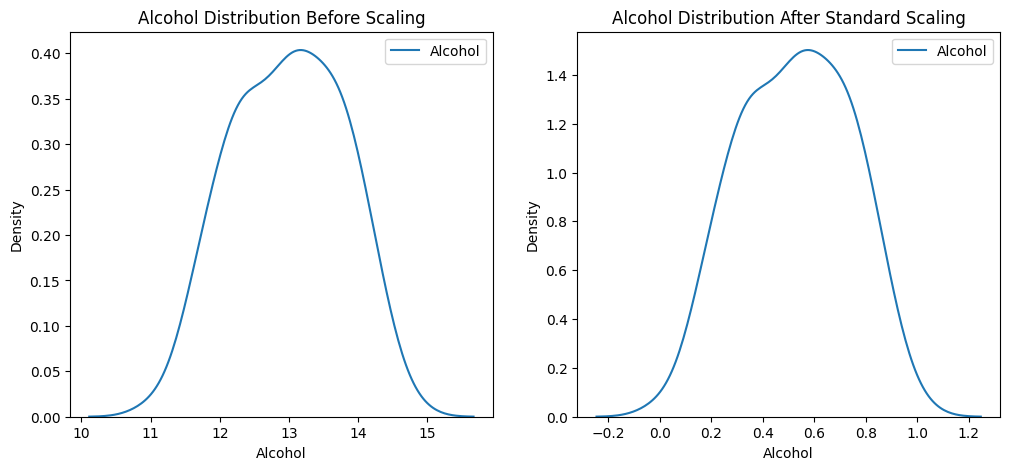

In [127]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Alcohol Distribution Before Scaling')
sns.kdeplot(x_train['Alcohol'], ax=ax1,label='Alcohol')
ax1.legend()

# after scaling
ax2.set_title('Alcohol Distribution After Standard Scaling')
sns.kdeplot(x_train_scaled['Alcohol'], ax=ax2,label='Alcohol')
ax2.legend()
plt.show()

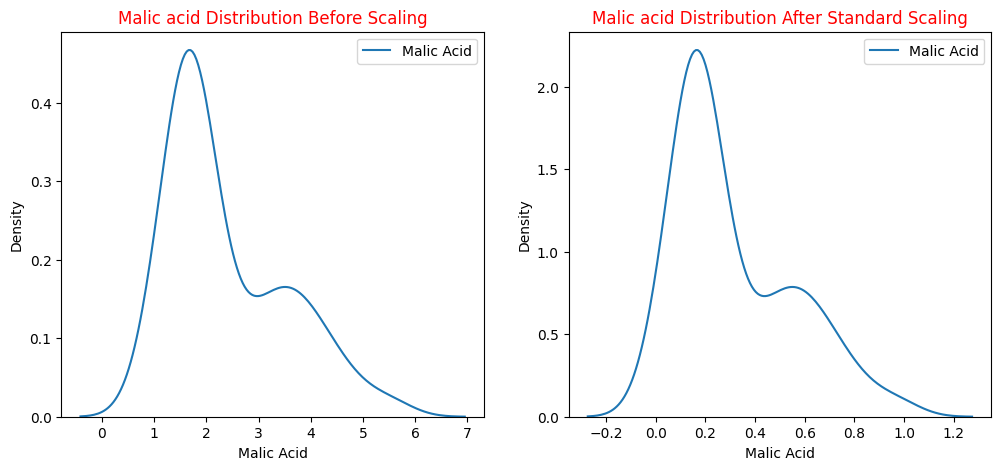

In [130]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Malic acid Distribution Before Scaling',color='red')
sns.kdeplot(x_train['Malic Acid'], ax=ax1,label='Malic Acid')
ax1.legend()

# after scaling
ax2.set_title('Malic acid Distribution After Standard Scaling',color='red')
sns.kdeplot(x_train_scaled['Malic Acid'], ax=ax2,label='Malic Acid')
ax2.legend()
plt.show()